In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and preprocessing

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation
2. Negative Correlation

In [ ]:
# Select only the numeric columns
numeric_data = gold_data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()


<Axes: >

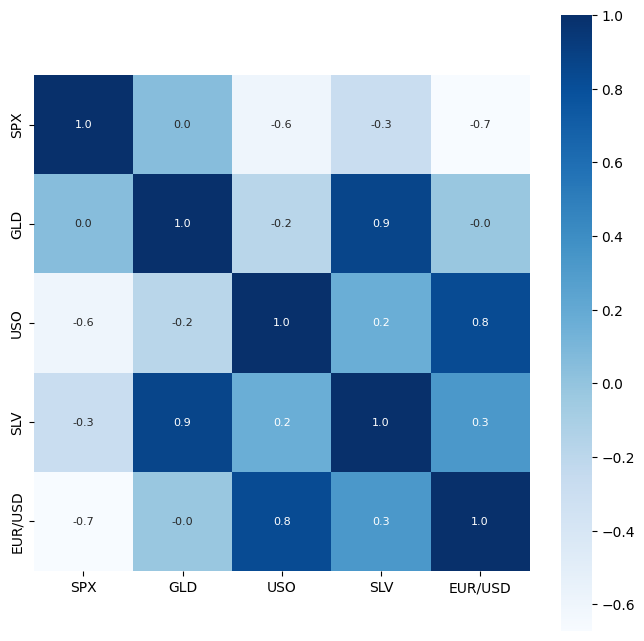

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-23-6ece3fe1684f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

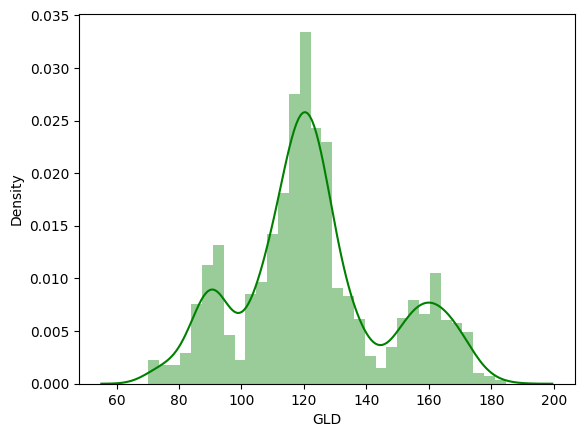

In [ ]:
#checking the distribution
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data into train and test split

In [ ]:
X_train , X_test , Y_train ,Y_test = train_test_split(X, Y , test_size = 0.2, random_state =2)

Model Training : Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.43069888  81.65099998 115.94799984 127.5954006  120.69910136
 154.85809767 150.62019872 126.18790091 117.62869871 126.09810022
 116.77220113 170.86480085 141.57759906 167.94289824 115.26560008
 117.55110039 138.19240235 169.98350097 159.60550256 158.26429984
 155.07980002 125.33319983 176.39139931 157.89830216 125.21510008
  93.80379989  77.44710011 120.62279987 118.99529905 167.42700025
  88.20980015 125.38050055  91.12360055 117.75920013 121.13119889
 136.03420081 115.80440113 115.2321006  147.37210005 107.3041009
 104.49720268  87.09259791 126.44620047 117.98369984 153.01829932
 119.7247002  108.25330037 108.29549839  93.22600031 127.01359793
  75.22080037 113.71029968 121.5256001  111.40129905 118.90559877
 121.02129887 159.19349939 168.45680054 146.92189662  85.65649887
  94.52040006  86.75209897  90.62190023 119.1281005  126.50360034
 127.40180027 168.69469965 122.24649932 117.65239892  98.6422003
 167.76270131 143.0254981  131.84170205 121.21770212 120.62519953
 119.6714005

In [ ]:
#R Scored error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared error: ", error_score)

R Squared error:  0.9893616309626461


Compare the actual values and predicted values in a plot

In [ ]:
Y_test = list(Y_test)

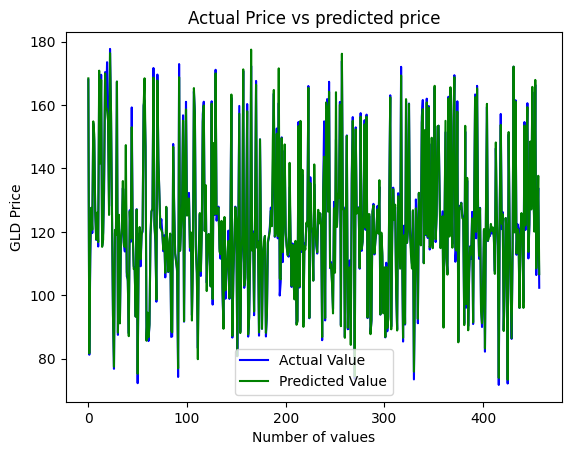

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title("Actual Price vs predicted price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()